### Importing libraries and dataset

In [1]:
# stats, data manipulation and analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats

# modeling, training, evaluation
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("Walmart_sales.csv")

### Data Pre-Processing

In [4]:
df.shape

(6435, 8)

There are 6435 rows and 8 columns in our dataset.

In [5]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [6]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


#### Missing and Duplicate Values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [8]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

No missing values found in the dataset.

In [9]:
df[df.duplicated()]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment


No duplicated values found in the dataset.

#### Dropping Unnecessary Columns

To keep things simple and numerical, we will drop the "Store" number column and the "Date" column.

In [10]:
df.drop(["Store", "Date"], axis = 1, inplace = True)

In [11]:
df.columns

Index(['Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment'],
      dtype='object')

In [12]:
df.head()

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1643690.90,0,42.31,2.572,211.096358,8.106
1,1641957.44,1,38.51,2.548,211.242170,8.106
2,1611968.17,0,39.93,2.514,211.289143,8.106
3,1409727.59,0,46.63,2.561,211.319643,8.106
4,1554806.68,0,46.50,2.625,211.350143,8.106


### Statistical Analysis

In [13]:
df.describe(include = 'all')

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [14]:
def calculate_majority_moments(dataset):    
    """The majority moments (mean, median, standard deviation, skewness, and kurtosis) of the dataset's columns are determined by this function."""
    majority_moments_df = {
        'Skewness': dataset.skew(),
        'Kurtosis': dataset.kurtosis(),
        'Mean': dataset.mean(),
        'Median': dataset.median(),
        'Standard Deviation': dataset.std()
    }
    
    majority_moments_df = pd.DataFrame(majority_moments_df)
    majority_moments_df.index.name = 'Column'
    
    return majority_moments_df

moments_df = calculate_majority_moments(df.copy())
print("MAJORITY MOMENTS:")
display(moments_df)

MAJORITY MOMENTS:


,Skewness,Kurtosis,Mean,Median,Standard Deviation
Column,,,,,
Weekly_Sales,0.668362,0.053141,1.046965e+06,960746.040000,564366.622054
Holiday_Flag,3.373499,9.383410,6.993007e-02,0.000000,0.255049
Temperature,-0.336768,-0.612801,6.066378e+01,62.670000,18.444933
Fuel_Price,-0.096158,-1.177378,3.358607e+00,3.445000,0.459020
CPI,0.063492,-1.839813,1.715784e+02,182.616521,39.356712
Unemployment,1.188144,2.639712,7.999151e+00,7.874000,1.875885


Let's first talk about skewness and kurtosis before moving on to the numerical numbers mentioned above:

**Skewness:** It is employed to quantify the degree of asymmetry present in the value distribution of a specific variable. The distribution is perfectly symmetrical if the value is 0. A positively skewed distribution (right-skewed) is indicated if the value is greater than 0. A left-skewed distribution with a negative skew is indicated by a value less than 0.

**Kurtosis:** It describes the shape of the distribution in comparison to a normal distribution and is used to measure the distribution's shape. The distribution has a peak that is identical to a normal distribution if the value is 0. The distribution is more peaked (has heavier tails) if the value is greater than 0. The distribution is flattened (lighter tails) if the value is less than 0.

**Weekly_Sales:**
* Skewness: 0.668362 (slight positively skewed)
* Kurtosis: 0.053141 (closely follows the normal distribution)

**Temperature:**
* Skewness: -0.336768 (slight negatively skewed)
* Kurtosis: -0.612801 (a little flattened peak but very close to the normal distribution)
  
**Holiday_Flag:**
* Skewness: 3.373499 (positively skewed)
* Kurtosis: 9.383410  (more peaked than a normal distribution)

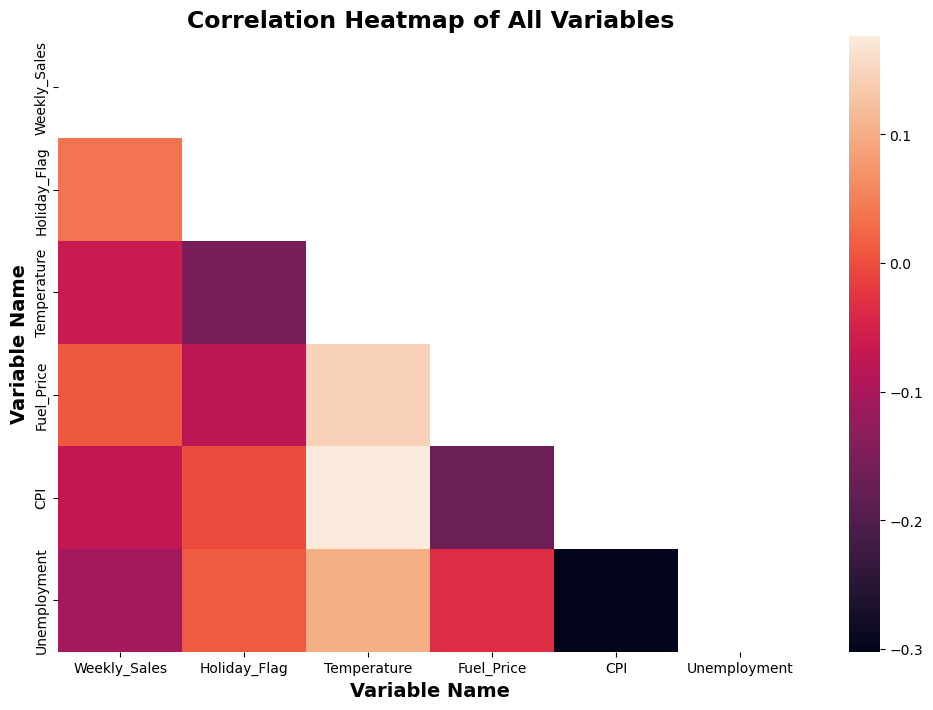

In [15]:
def correlation_heatmap(dataset):
    """This function creates a heatmap of correlation for each column in the dataset."""
    corr = dataset.corr()
    
    # avoid redundancy by getting the lower portion of the heatmap only
    matrix = np.triu(corr)
    
    # build the heatmap
    plt.figure(figsize = (12, 8))
    sns.heatmap(corr, annot=True, fmt=".2%", mask=matrix)   
    plt.title("Correlation Heatmap of All Variables", fontsize=17, fontweight='bold')
    plt.xlabel("Variable Name", fontsize=14, fontweight='bold')
    plt.ylabel("Variable Name", fontsize=14, fontweight='bold')
    plt.savefig('1.Variables_Correlation_Heatmap.png', dpi=300)
    plt.show()

correlation_heatmap(df)

In [16]:
corr = df.corr()
corr

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Weekly_Sales,1.000000,0.036891,-0.063810,0.009464,-0.072634,-0.106176
Holiday_Flag,0.036891,1.000000,-0.155091,-0.078347,-0.002162,0.010960
Temperature,-0.063810,-0.155091,1.000000,0.144982,0.176888,0.101158
Fuel_Price,0.009464,-0.078347,0.144982,1.000000,-0.170642,-0.034684
CPI,-0.072634,-0.002162,0.176888,-0.170642,1.000000,-0.302020
Unemployment,-0.106176,0.010960,0.101158,-0.034684,-0.302020,1.000000


Correlation coefficient is a statistical measure that determines the strength of a direct association between variables in the range of -1 to 1 is the correlation measure. It is also known as Pearson's coefficient.*  A perfect positive correlation, or one in which both variables would rise if one increased, is indicated by a value of 1
*  A perfect negative correlation is represented by a value of -1, which implies that if one variable increased, the other would decrease
*  There is no association between the variables when the value is 0.  

The target variable "Weekly_Sales" has few strong links in our dataset, which could pose issues during the modeling stage.

### EDA and Data Visualization

#### Plotting the Distributions of All Columns

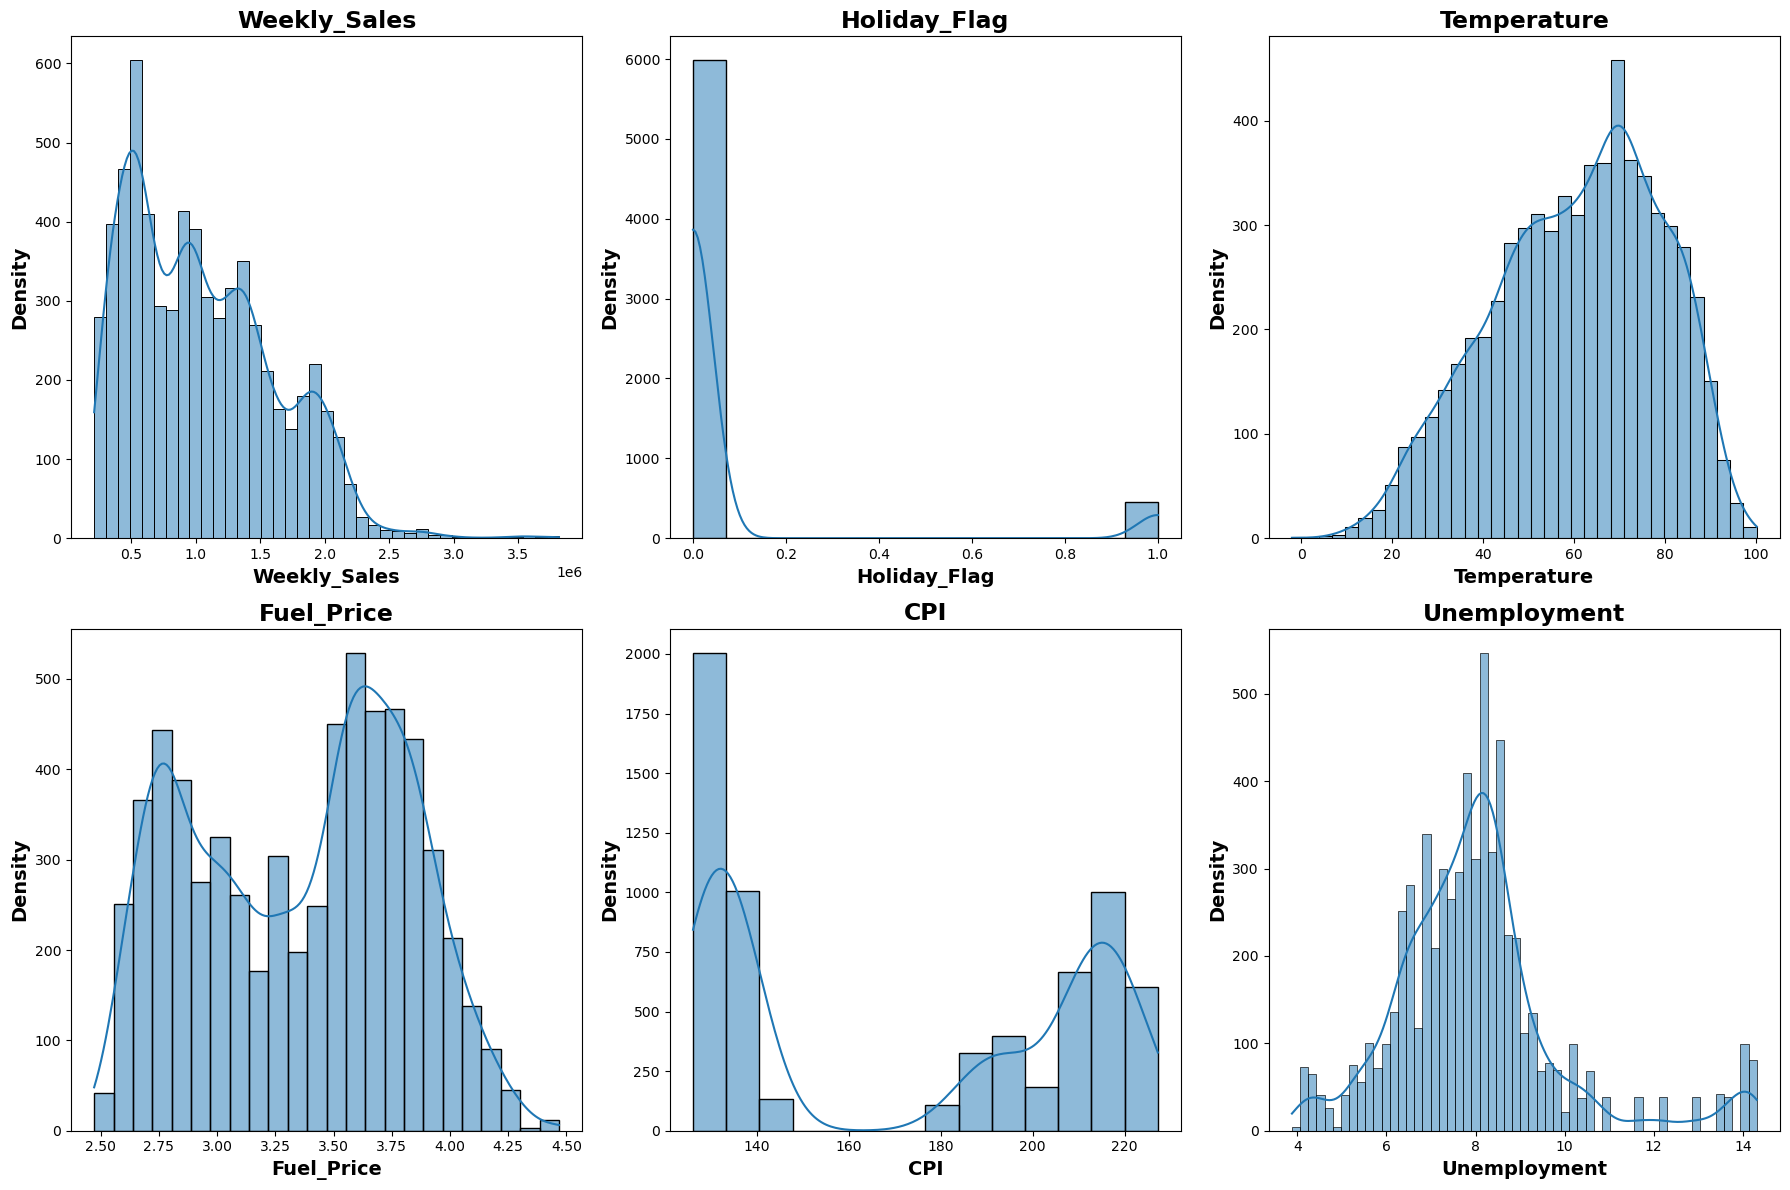

In [17]:
def plot_numerical_distributions(dataset):
    """Plotting the dataset's numerical column distributions in a grid format is the responsibility of this function."""
    # calculate the number of rows needed to plot all numerical columns
    num_rows = len(dataset.columns) // 3
    if len(dataset.columns) % 3 != 0:
        num_rows += 1

    # set up the figure and the axes
    fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(18, 6 * num_rows))  
    for i, column in enumerate(dataset.columns):
        row = i // 3
        col = i % 3

        # create density plots of numerical columns
        sns.histplot(dataset[column], kde=True, ax=axes[row, col])
        axes[row, col].set_title(f'{column}', fontsize=17, fontweight='bold')
        axes[row, col].set_xlabel(column, fontsize=14, fontweight='bold')
        axes[row, col].set_ylabel('Density', fontsize=14, fontweight='bold')

    # remove empty subplots which were not used
    for i in range(len(dataset.columns), num_rows * 3):
        row = i // 3
        col = i % 3
        fig.delaxes(axes[row, col])

    plt.tight_layout()
    plt.savefig("2.Numerical_Columns_Distribution.png", dpi=300)
    plt.show()
    
plot_numerical_distributions(df)

As mentioned above too, the distribution of "Weekly_Sales" is right skewed which means that there are very less high values.

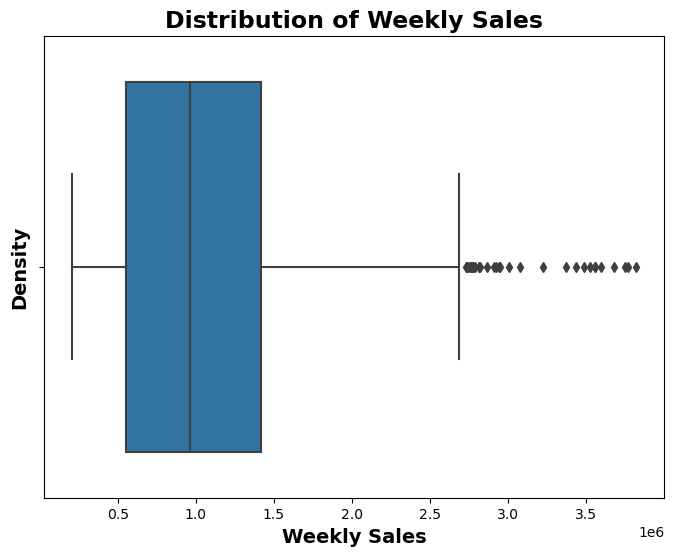

In [18]:
def weekly_sales_distribution_boxplot(dataset):
    """Plots the distribution of Weekly_Sales using a boxplot."""
    plt.figure(figsize=(8, 6))
    sns.boxplot(x = 'Weekly_Sales', data = dataset)
    plt.title('Distribution of Weekly Sales', fontsize=17, fontweight='bold')
    plt.xlabel('Weekly Sales', fontsize=14, fontweight='bold')
    plt.ylabel('Density', fontsize=14, fontweight='bold')
    plt.savefig("3.Weekly_Sales_Distribution_Boxplot.png", dpi=300)
    plt.show()

weekly_sales_distribution_boxplot(df)

With this visualization, we can see that there are certain outliers in the "Weekly_Sales" variable, it would be better if we remove them. The strategy we use here would be the interquartile range, i.e., anything 1.5 times outside this range would be considered an outlier.

In [19]:
def remove_outliers_iqr(dataset, column):
    """Remove outliers from a specific column using the interquartile range method."""
    Q1 = dataset[column].quantile(0.25)
    Q3 = dataset[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # keep only the values within the bounds
    dataset_filtered = dataset[(dataset[column] >= lower_bound) & (dataset[column] <= upper_bound)]
    
    return dataset_filtered

# remove outliers from the Weekly_sales column
df_filtered = remove_outliers_iqr(df, 'Weekly_Sales')

#### Scatter Plot Relationship of Columns

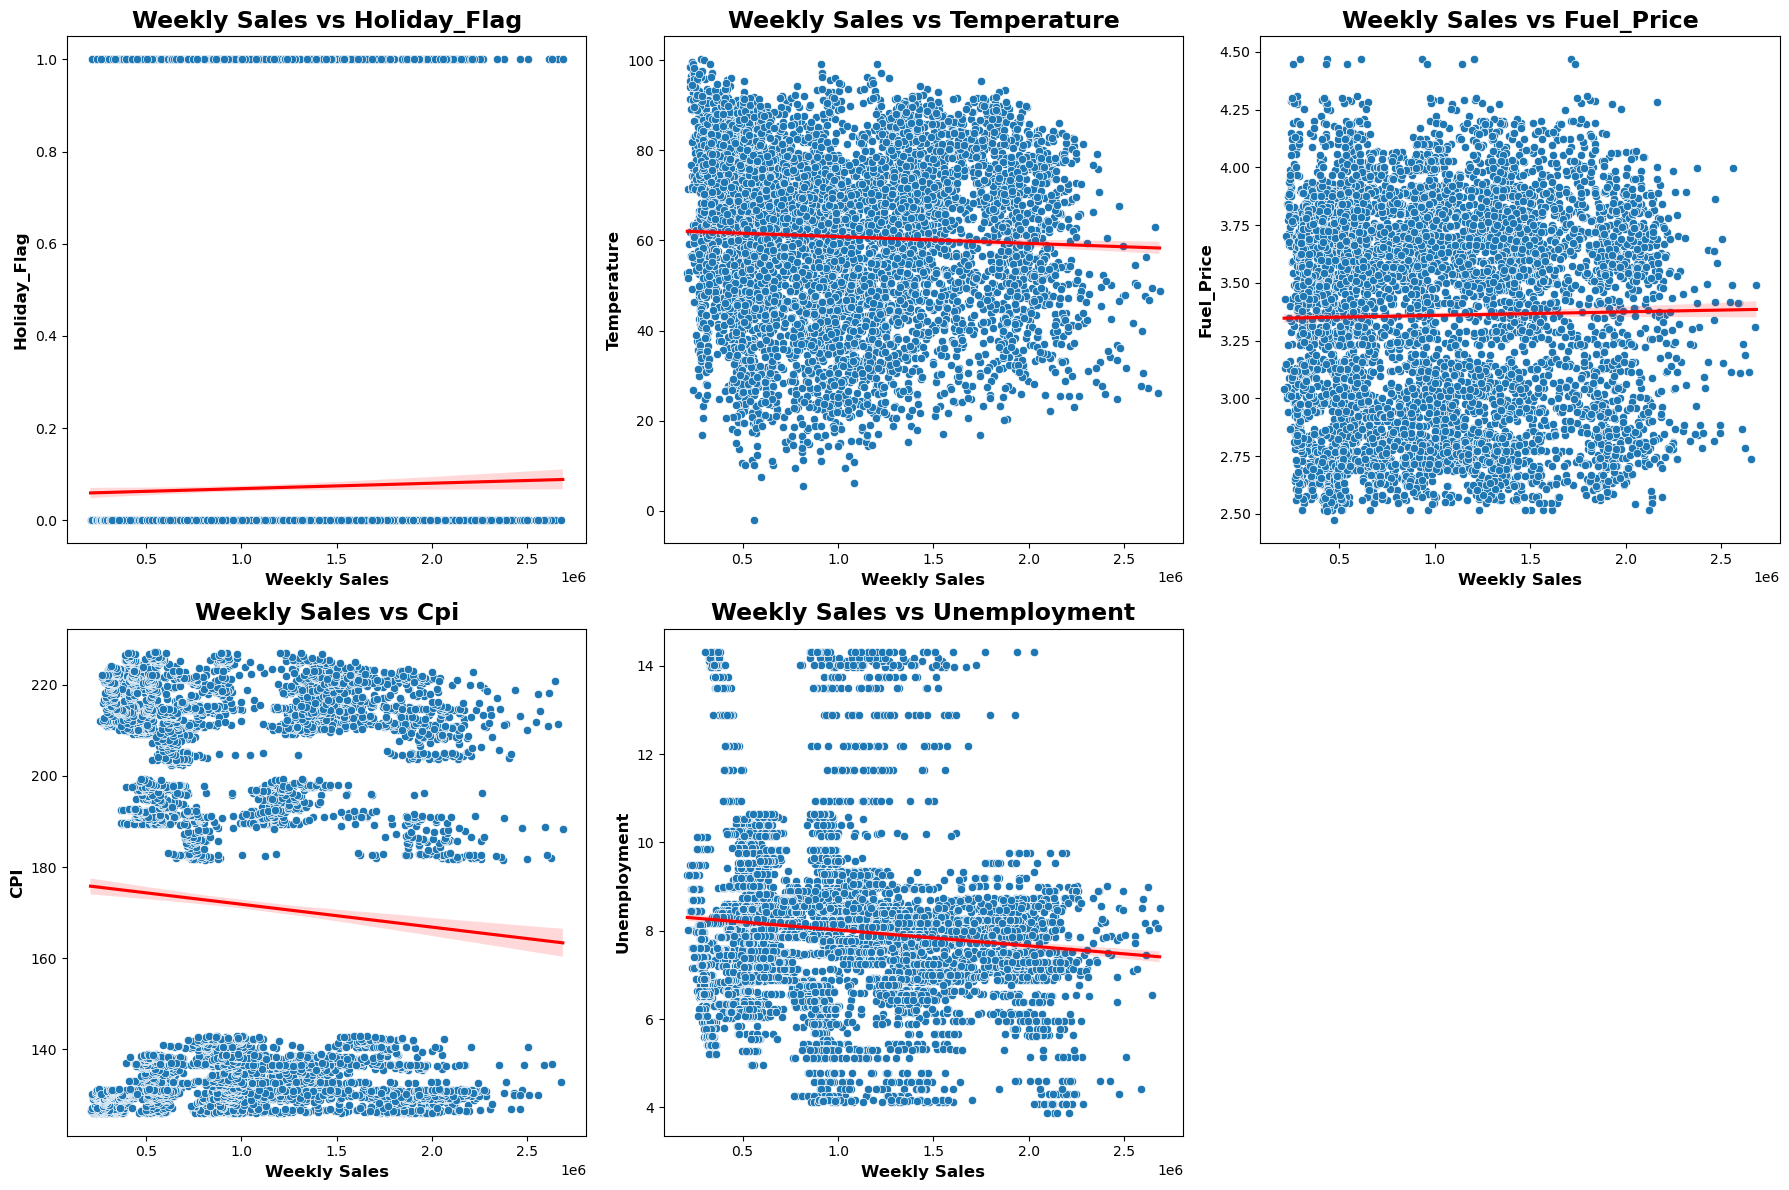

In [20]:
def scatter_plots(dataset):
    """Plot the relationship of the target variable (Weekly_Sales) against all other variables."""
    columns = dataset.columns
    
    # calculate the number of rows needed
    num_rows = len(columns[1:]) // 3
    if len(columns[1:]) % 3 != 0:
        num_rows += 1

    # setting up the figure and axes
    fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(18, 6 * num_rows))  
    for i, column in enumerate(columns[1:]):
        row = i // 3
        col = i % 3
        
        sns.scatterplot(x='Weekly_Sales', y=column, data=dataset, ax=axes[row, col])
        sns.regplot(x='Weekly_Sales', y=column, data=dataset, scatter=False, ax=axes[row, col], color='red')
        axes[row, col].set_xlabel('Weekly Sales', fontsize=12, fontweight='bold')
        axes[row, col].set_ylabel(column, fontsize=12, fontweight='bold')
        axes[row, col].set_title(f'Weekly Sales vs {str.title(column)}', fontsize=17, fontweight='bold')
        
    # remove empty subplots
    for i in range(len(columns[:-1]), num_rows * 3):
        row = i // 3
        col = i % 3
        fig.delaxes(axes[row, col])
        
    plt.tight_layout()
    plt.savefig('4.Scatter_Plots_of_Weekly_Sales.png', dpi=300)
    plt.show()

scatter_plots(df_filtered) 

It seems there is not much relationship between the "Weekly_Sales" and other variables, there just seems to be a slight relationship and a very strong one.

### Model Trainings and Model Evaluations

#### Elbow Method: For Identifying Optimal Number of Clusters

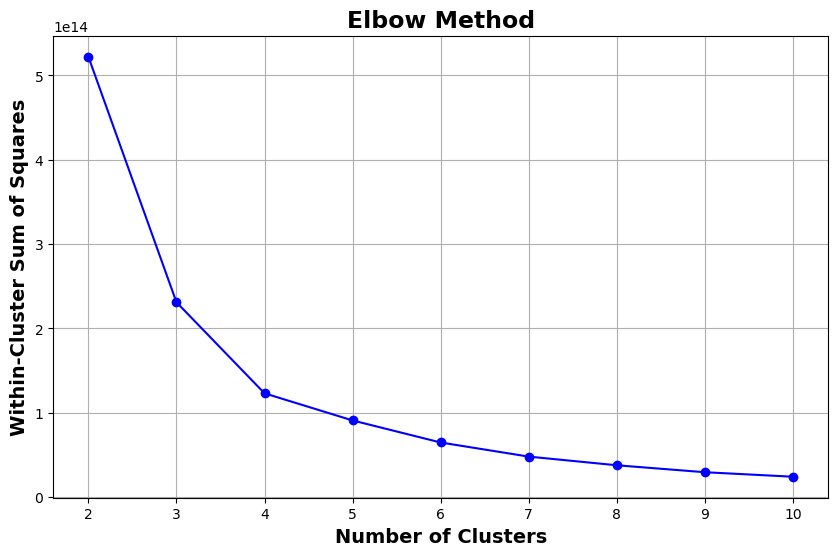

In [21]:
def elbow_method(dataset):
    """This function determines the ideal number of clusters for the K-Means clustering process and returns the model's inertia values 
       for each K (cluster) as well as the k-values that were evaluated."""
    # initialize lists to store inertia values
    inertia_values = []
    
    # test different values of k (clusters) 
    k_values = range(2, 11)  
    for k in k_values:
        # create KMeans clustering model
        kmeans = KMeans(n_clusters = k, init='k-means++', n_init=10, max_iter=300, random_state=42)
        kmeans.fit(dataset)
    
        # append the inertia value to the list
        inertia_values.append(kmeans.inertia_)

    return k_values, inertia_values
    
k_values, inertia_values = elbow_method(df_filtered)

# plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters', fontsize=14, fontweight='bold')
plt.ylabel('Within-Cluster Sum of Squares', fontsize=14, fontweight='bold')
plt.title('Elbow Method', fontsize=17, fontweight='bold')
plt.xticks(k_values)
plt.grid(True)
plt.savefig('4.Elbow_Method.png', dpi=300)
plt.show()

The optimal number of clusters in this case seems to be 4.

#### K-Means Clustering

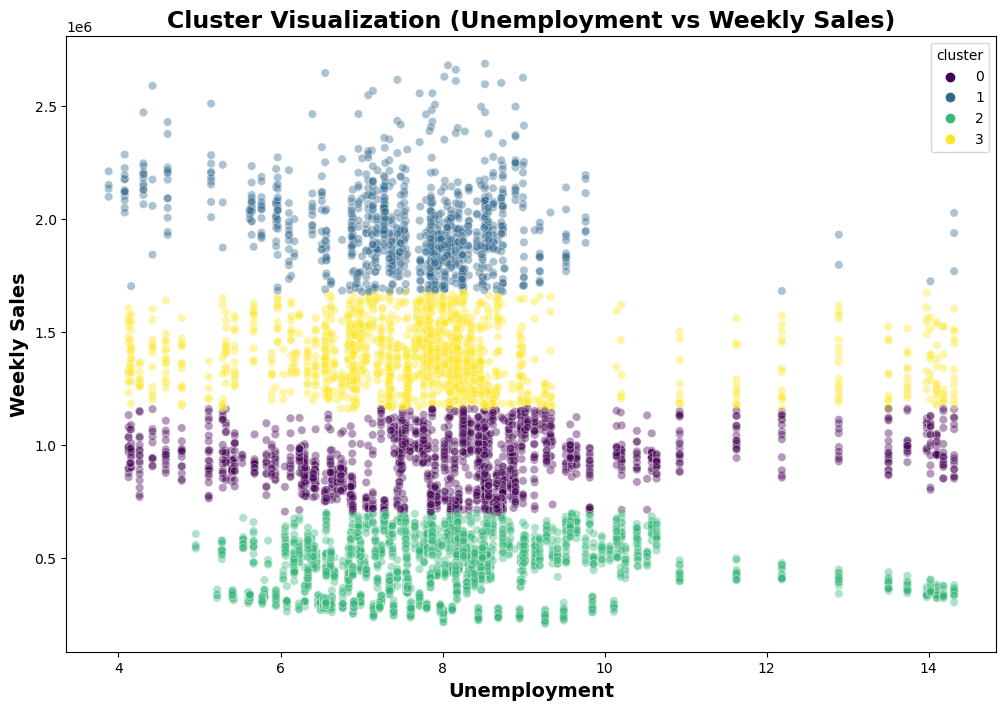

In [22]:
def kmeans_modeling(dataset, clusters = 4):
    """Using the provided dataset and cluster number, this function builds a K-Means model and returns the trained model."""
    # instantiate the KMeans model
    kmeans_model = KMeans(n_clusters = clusters)
    
    # fit the model to the scaled data
    kmeans_model.fit(dataset)

    return kmeans_model

kmeans_model = kmeans_modeling(df_filtered)

# add a cluster column in the reduced data
df_filtered['cluster'] = kmeans_model.labels_

# Plot the clusters made by the K-Means model
plt.figure(figsize = (12, 8))
sns.scatterplot(x = 'Unemployment', y = 'Weekly_Sales', hue = 'cluster', data = df_filtered, palette='viridis', alpha=0.4 )
plt.title('Cluster Visualization (Unemployment vs Weekly Sales)', fontsize = 17, fontweight = 'bold')
plt.xlabel('Unemployment', fontsize=14, fontweight='bold')
plt.ylabel('Weekly Sales', fontsize=14, fontweight='bold')
plt.savefig("5.Cluster_Visualization.png")
plt.show()

In [23]:
# example new data point(s) for prediction
new_data = pd.DataFrame({'Weekly_Sales': [150000, 200001], 'Holiday_Flag': [0, 0], 'Temperature': [43, 34], 'Fuel_Price': [4.98, 4.95], 
                         'CPI': [2.1192, 4.1209], 'Unemployment': [9.13, 10]})

# use the trained K-means model to predict cluster labels for the new data
predicted_clusters = kmeans_model.predict(new_data)

# display the predicted cluster labels for the new data points"
for i, cluster_label in enumerate(predicted_clusters):
    print(f"Predicted Cluster for New Data Point {i + 1}: {cluster_label}")

Predicted Cluster for New Data Point 1: 2
Predicted Cluster for New Data Point 2: 2


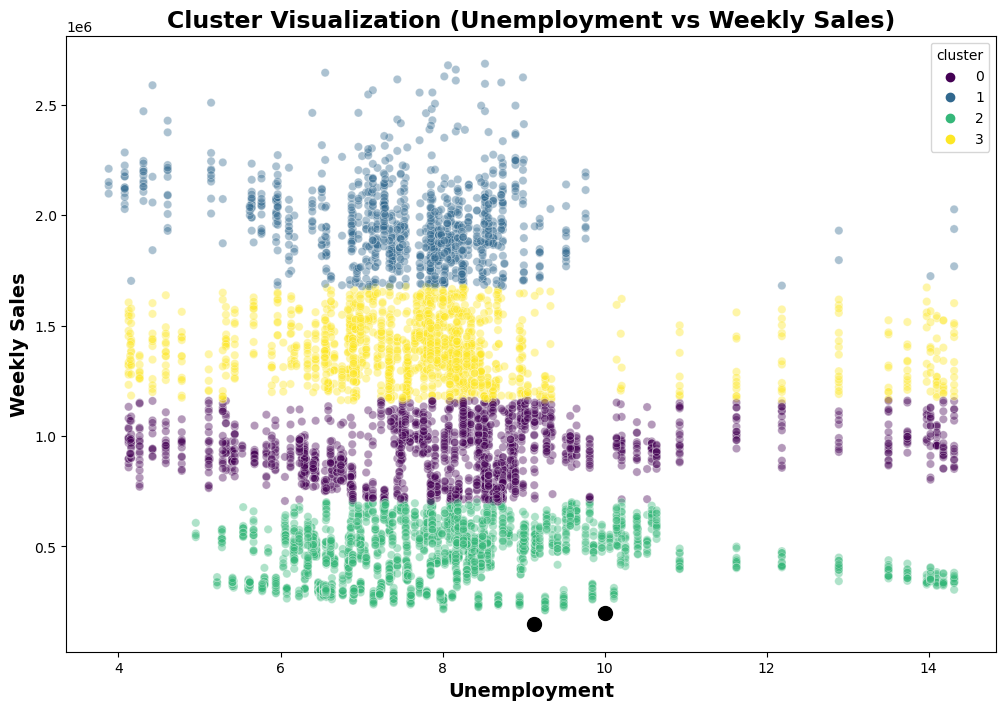

In [24]:
# plot the clusters made by the K-Means model
plt.figure(figsize = (12, 8))
sns.scatterplot(x = 'Unemployment', y = 'Weekly_Sales', hue = 'cluster', data = df_filtered, palette='viridis', alpha=0.4 )

# plot the new predicted data points
plt.scatter(new_data['Unemployment'], new_data['Weekly_Sales'], marker='o', s=100, c='black', label = 'New Predicted Data Points')

plt.title('Cluster Visualization (Unemployment vs Weekly Sales)', fontsize = 17, fontweight = 'bold')
plt.xlabel('Unemployment', fontsize=14, fontweight='bold')
plt.ylabel('Weekly Sales', fontsize=14, fontweight='bold')
plt.savefig("6.Cluster_Visualization_2.png")
plt.show()

#### Fitting Predictions

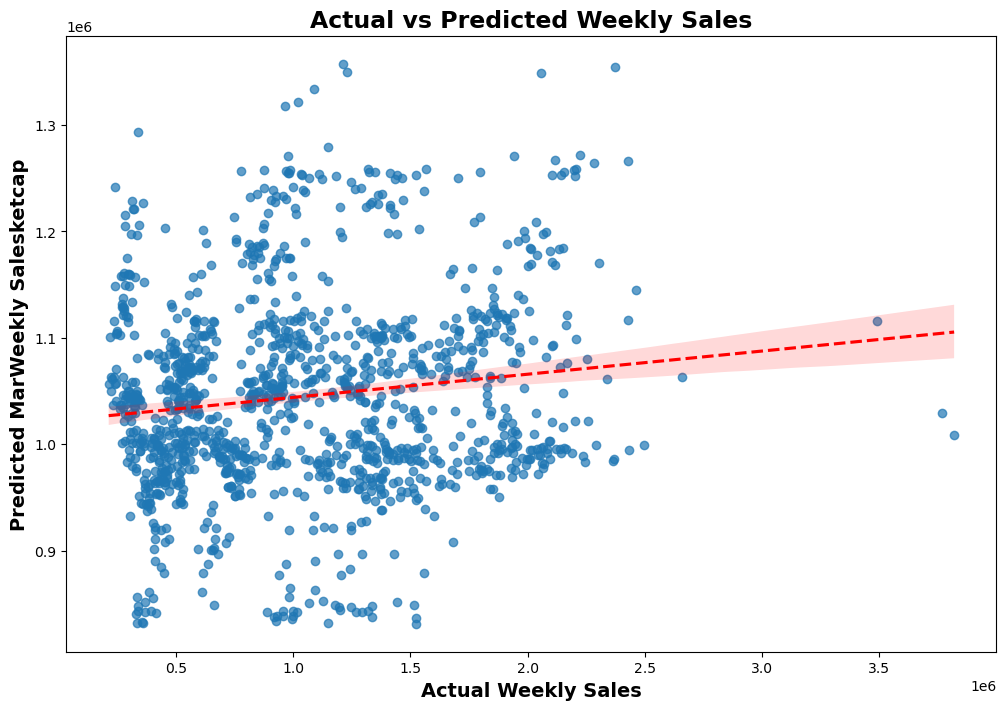

In [25]:
def fitting_predictions(X_train, y_train, X_test):    
    """This function trains a linear regression model using the input data (training and testing). Subsequently, 
       the trained model and the predictions based on the test data are returned."""
    # initialize Linear Regression model
    LR_model = LinearRegression()
    
    # fit the model on the training data
    LR_model.fit(X_train, y_train)

    # predict on the test data
    y_pred = LR_model.predict(X_test)

    return LR_model, y_pred

# separate features (X) and target variable (y)
X = df.drop('Weekly_Sales', axis=1)
y = df['Weekly_Sales']

# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

LR_model, y_pred = fitting_predictions(X_train, y_train, X_test)

# plot the predicted vs actual values with confidence intervals
plt.figure(figsize=(12, 8))
sns.regplot(x = y_test, y = y_pred, scatter_kws={"alpha":0.7}, line_kws={"color":"red", "linestyle":"--"}, ci=95)
plt.title('Actual vs Predicted Weekly Sales', fontsize=17, fontweight='bold')
plt.xlabel('Actual Weekly Sales', fontsize=14, fontweight='bold')
plt.ylabel('Predicted MarWeekly Salesketcap', fontsize=14, fontweight='bold')
plt.savefig('7.Linear_Regressionp.png', dpi=300)
plt.show()

#### Linear Regression Evaluation

In [26]:
def evaluate_fitting_predictions(LR_model, y_test, y_pred):
    """This function takes in the regression model, the test data, and the predicted data, and prints the performance metrics 
       which involve the model coefficients, model intercept, R-squared score, root mean squared error, mean absolute error."""
    # calculate the model's coefficients and intercept
    coefficients = LR_model.coef_
    intercept = LR_model.intercept_
    print(f'Coefficients {coefficients}')
    print(f'Intercept: {intercept}')
    
    # calculate r-squared score (accuracy)
    r2 = r2_score(y_test, y_pred)
    print(f'R2: {r2}')
    
    # calculate root mean squared error
    rmse = mean_squared_error(y_test, y_pred, squared = False)
    print(f'RMSE: {rmse}')
    
    # calculate mean absolute error
    mae = mean_absolute_error(y_test, y_pred)
    print(f'MAE {mae}')

evaluate_fitting_predictions(LR_model, y_test, y_pred)

Coefficients [ 85575.74722369   -503.22976212 -20058.29054351  -1646.71276853
 -43843.10550802]
Intercept: 1770208.2093198858
R2: 0.01738312550370069
RMSE: 562631.7724810028
MAE 475432.53295882524
